# Clustering Model- Mall Customers Segmentation

## Business Objective
* To create Customer cluster to identify the different types of customers 

In [1]:
import pandas as pd #to work with DataFrame 
import numpy as np # for numeric problems
import matplotlib.pyplot as plt #to visualization 
import seaborn as sns
from sklearn import preprocessing #preprocessing 
from sklearn.preprocessing import StandardScaler # to scale the dataframe
import warnings # to ignore the warning 
warnings.filterwarnings('ignore') 
import matplotlib #to visualize 
colors=[] #list for storing colurs 
import matplotlib.colors as mcolors # gettting colours name from matplotlib
for i in mcolors.CSS4_COLORS:
    colors.append(i)
colors=colors[10:]

In [2]:
raw_df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df=raw_df.copy()   #copying dataframes

In [3]:
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Checking for Null Values

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### THERE IS NO NULL VALUES

## Checking for Categorical Varibale and Continous Variable in Data

In [8]:
cat = [] 
cont = []
for i in df:
    if len(df[i].unique())>40:
        cont.append(i)
    else:
        cat.append(i)
from tabulate import tabulate
print(tabulate({'cat':cat,'cont':cont},headers=['Categorical','Continous'], tablefmt='grid', showindex=[1,2,3,4]))

+----+---------------+------------------------+
|    | Categorical   | Continous              |
+====+===============+========================+
|  1 | Gender        | CustomerID             |
+----+---------------+------------------------+
|  2 |               | Age                    |
+----+---------------+------------------------+
|  3 |               | Annual Income (k$)     |
+----+---------------+------------------------+
|  4 |               | Spending Score (1-100) |
+----+---------------+------------------------+


# EDA - Univariate

#### Exploring Genders 

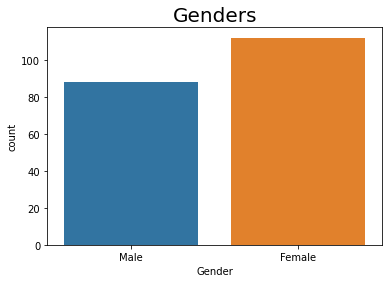

In [9]:
plt.title('Genders',fontsize=(20))
sns.countplot(x = df['Gender']);

#### Interpretation: Count of Male Customers is comparatively less than Female Customers

#### Exploring Numeric Variables of Dataset

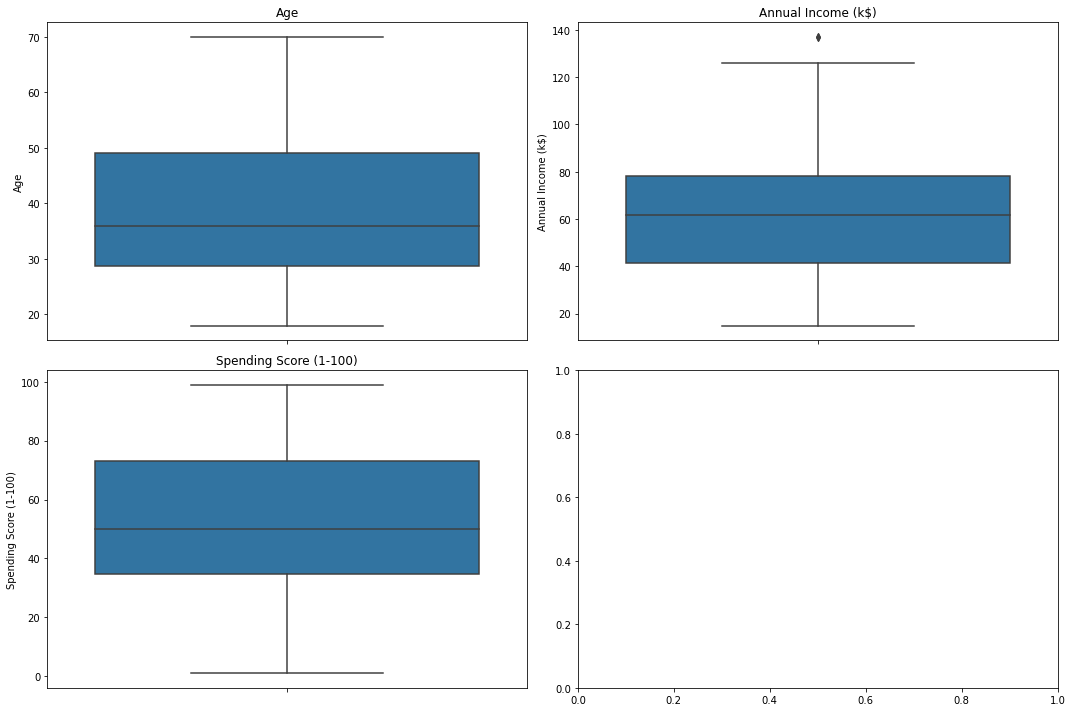

In [10]:
a=[] #creating empty list all numeric variables in Dataset
for i in df: 
    if df[i].dtype == 'int64': #if variable is numeric type it will store in a
        a.append(i)
a=a[1:] #droping cutomer id from list a
sns_df=df[a] #getting all the columns present in list a 
fig , axes =plt.subplots(2,2,figsize=(15,10),tight_layout=True) #visualizing using subplot
for i, j in zip(range(3),axes.flatten()): #used for loof to plot all graph in one go with the help of ZIP function
    j.set_title(a[i])
    sns.boxplot(data=sns_df,y=a[i],ax=j)

#### Interpretation: 
* Age: Most of the customers age range in between 30-50 years
* Annual Income: Wide range of customer income range in between dollar 40-80k per annum.
* Spending Score(1-100): Most of the customers spending score is in between 30-70

In [11]:
a=df[df['Annual Income (k$)']>130]
data=df.drop(a.index,axis=0)

#### Exploring Numeric columns to get more insights using histogram

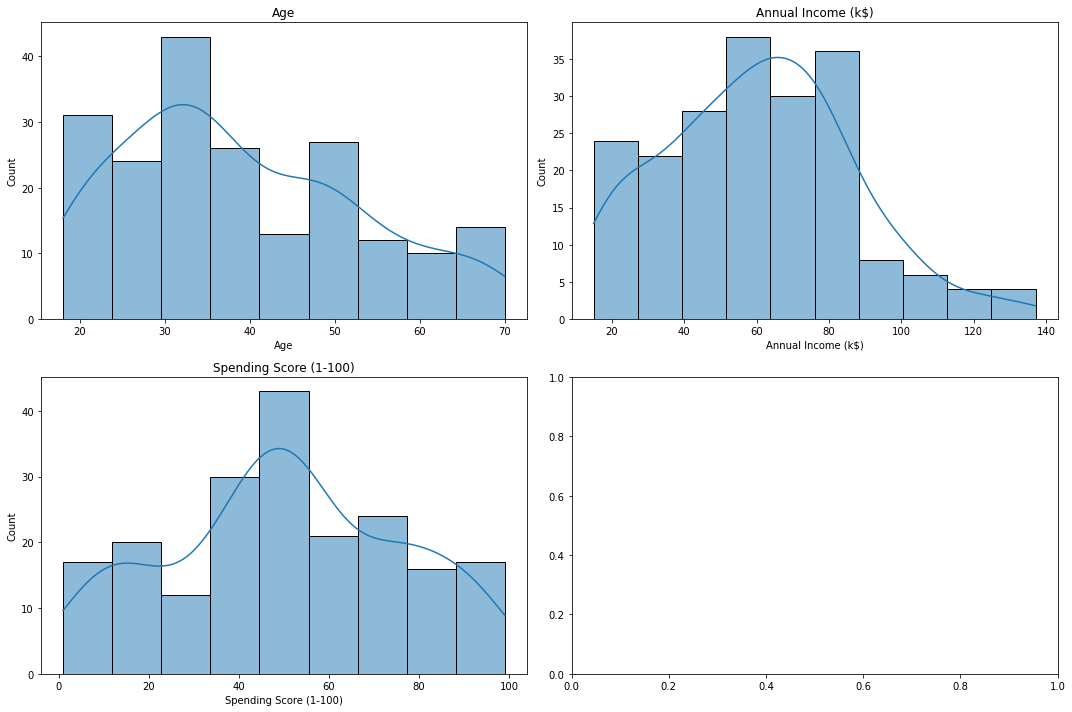

In [12]:
a=[] #creating empty list all numeric variables in Dataset
for i in df: 
    if df[i].dtype == 'int64': #if variable is numeric type it will store in a
        a.append(i)
a=a[1:] #droping cutomer id from list a
sns_df=df[a] #getting all the columns present in list a 
fig , axes =plt.subplots(2,2,figsize=(15,10),tight_layout=True) #visualizing using subplot
for i, j in zip(range(3),axes.flatten()): #used for loof to plot all graph in one go with the help of ZIP function
    j.set_title(a[i])
    sns.histplot(data=sns_df,x=a[i],ax=j, kde=True)

#### Interpretation:
* **Major Customers is in the age of 30-35 with annual income dollar 60-80k anually and there spending score lie between 45-55**

## Bivariate

#### Exploring Spending Score with respect to Annual Income and Age

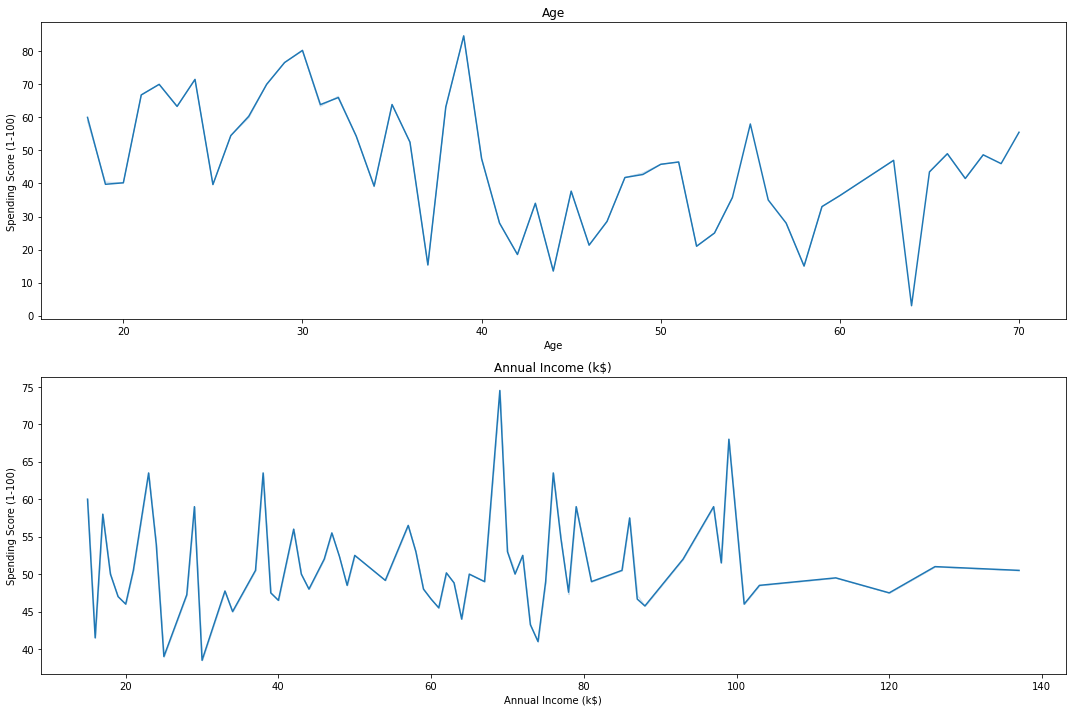

In [13]:
a=[]
for i in df:
    if df[i].dtype=='int64':
        a.append(i)
a=a[1:]
sns_df=df[a]
figs,axes=plt.subplots(2,1,figsize=(15,10),tight_layout=True) # to draw subplots of both features
for i,j in zip(range(3),axes.flatten()):
    j.set_title(a[i])
    sns.lineplot(data=sns_df,x=a[i],ax=j, y='Spending Score (1-100)',ci=False)

#### Interpretation: 
* Age: Spending Score decrease as the age increase max spending score can be seen for the customers whose age is somewhere around 38
* Annual Income: As we can see Anuual income does not have much impact on spending score however customers who have annual income between 70-75K have higher spending score    

#### Exploring Spending Score with respect to Annual Income and Age on Scatter Plot

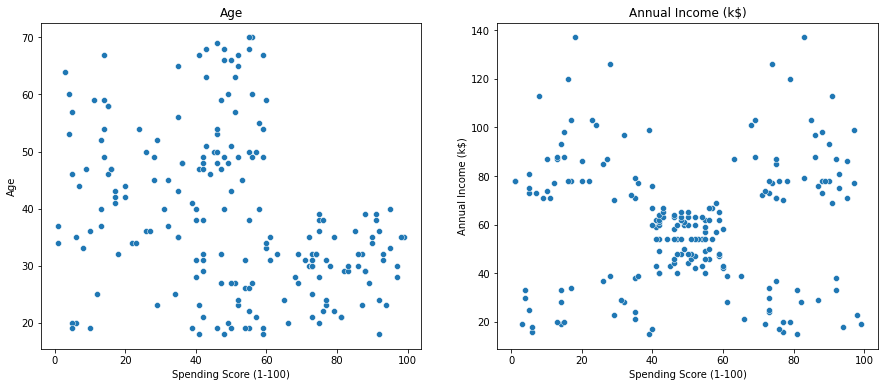

In [14]:
a=[]
for i in df:
    if df[i].dtype=='int64':
        a.append(i)
a=a[1:]
sns_df=df[a]
figs,axes=plt.subplots(1,2,figsize=(15,6)) #to visualize all features
for i,j in zip(range(3),axes.flatten()):
    j.set_title(a[i])
    sns.scatterplot(data=sns_df,y=a[i],ax=j, x='Spending Score (1-100)')

#### Interpetation: 
* Age: spending score decreases as the age increase
* Annual Income: as we can clearly see spending score for those who have income 40-60k per annum is lie between 40-60 and for rest cutomers it can be high and low

#### Exploring Continious Variables with respect to Gender

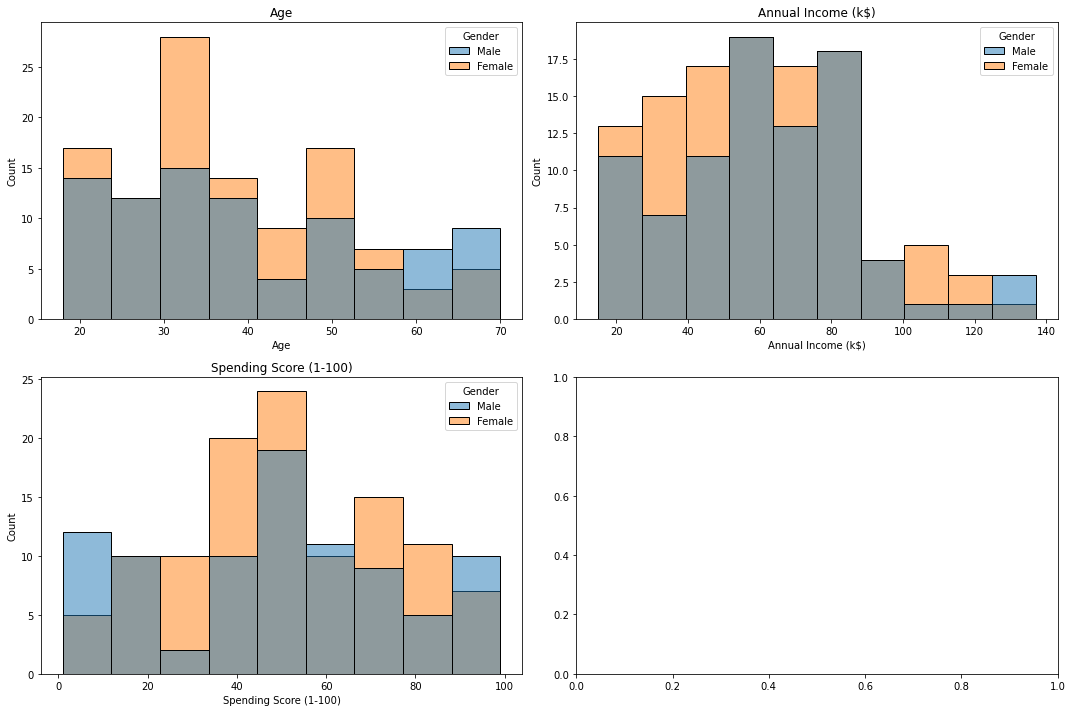

In [15]:
a=[] #creating empty list all numeric variables in Dataset
for i in df: 
    if df[i].dtype == 'int64': #if variable is numeric type it will store in a
        a.append(i)
a=a[1:] #droping cutomer id from list a
fig , axes =plt.subplots(2,2,figsize=(15,10),tight_layout=True) #visualizing using subplot
for i, j in zip(range(3),axes.flatten()): #used for loof to plot all graph in one go with the help of ZIP function
    j.set_title(a[i])
    sns.histplot(data=df,x=a[i],ax=j, hue='Gender')

#### Interpretation: 
* Females are less with low spending and very high spending score however there are more Females then males with medium spending Score
* Females count is high in the age range 30-50 
* Below 50K annual income females count is high after that males are more than females who earn more then 50k annually

## Multivariate

#### Exploring Spending Score with respect to Annual Income and Age for Males and Females

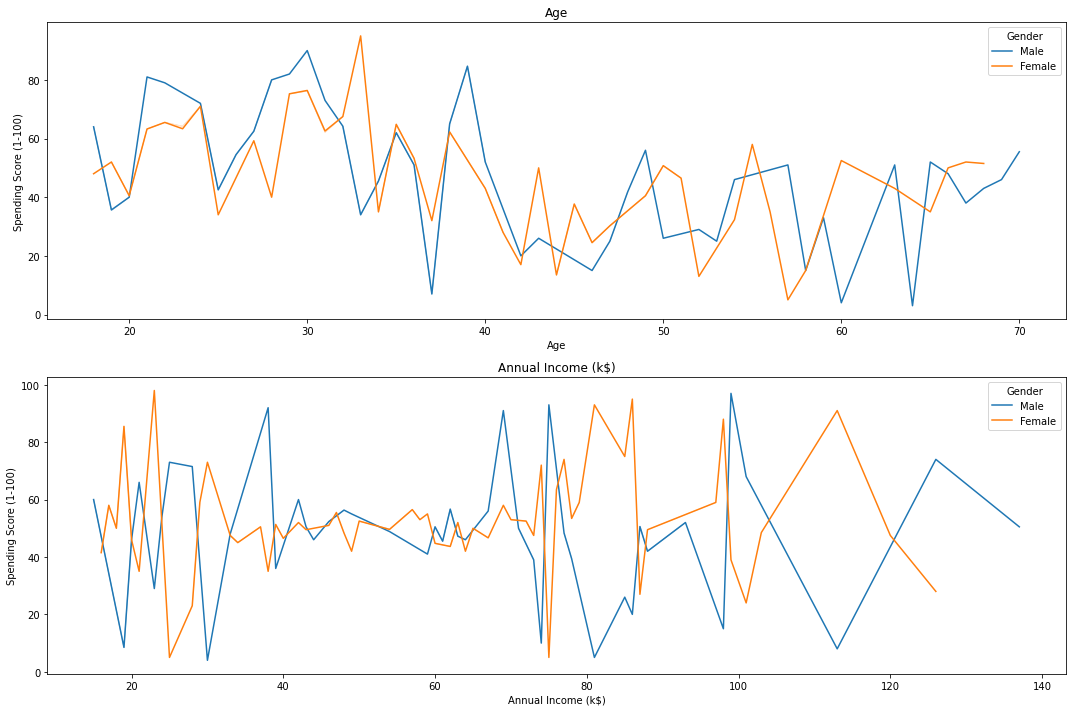

In [16]:
a=[]
for i in df:
    if df[i].dtype=='int64': #to get only int variables 
        a.append(i)
a=a[1:]
sns_df=df
figs,axes=plt.subplots(2,1,figsize=(15,10),tight_layout=True) #to subplot 
for i,j in zip(range(3),axes.flatten()):
    j.set_title(a[i])
    sns.lineplot(data=df,x=a[i],ax=j, y='Spending Score (1-100)',ci=False, hue='Gender' )

#### Interpretation: 
    Age: Spending Score decrease as the age increase max spending score can be seen for the customers whose age is somewhere around 30 and 40 for both male and Females
    Annual Income: Females with Very-Less/Very-High income have high spending score as compair to males

## LabelEncoding

In [17]:
encoder = preprocessing.LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Scaling the Data 

In [19]:
scaler= StandardScaler() 
scaled_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns) #to crating new scaled df 
scaled_df=scaled_df.iloc[:,2:] #droping two features 
scaled_df = data.iloc[:,2:] #as most of the values is in same scale os working with original data

In [20]:
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## First Model KMeans Clustering

### Model Bulding

In [21]:
from sklearn.cluster import KMeans
model = KMeans()
model.fit(scaled_df)

KMeans()

### Labels

In [22]:
Labels = model.labels_
Labels 

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 3, 5, 4,
       5, 3, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 6, 7, 6, 4, 6, 2, 6, 7, 6,
       4, 6, 7, 6, 7, 6, 7, 6, 2, 6, 4, 6, 7, 6, 2, 6, 7, 6, 7, 6, 2, 6,
       2, 6, 7, 6, 7, 6, 2, 6, 7, 6, 2, 6, 2, 6, 2, 6, 2, 6, 7, 6, 2, 6,
       2, 6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])

### Evalution

#### Elbow Curve

In [23]:
iner = []
for i in range(1,30):
    model = KMeans(n_clusters=i, random_state=10)
    model.fit(scaled_df) 
    inr = model.inertia_
    iner.append(inr)

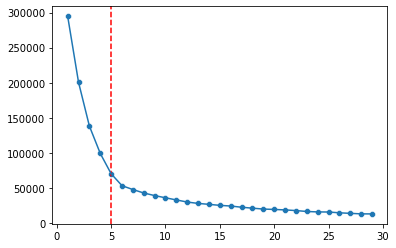

In [24]:
k = range(1,30)
plt.axvline(x=5, color='r', linestyle='--')
sns.lineplot(y=iner,x=k)
sns.scatterplot(y=iner,x=k);

#### Silhoutte Score

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
sls = []
for i in range(2,15):
    model=KMeans(n_clusters=i,random_state=10)
    model.fit(scaled_df)
    Labels = model.labels_
    a = silhouette_score(scaled_df, Labels)
    sls.append(a)
print(sls)

[0.2966221199277427, 0.3794966083348183, 0.40775328174434056, 0.44863190451683665, 0.45984228955477996, 0.44123985934812643, 0.41254795901691715, 0.38296691244122866, 0.36697508976355075, 0.3527999593118719, 0.3574272404715215, 0.343691946142572, 0.3312586790495967]


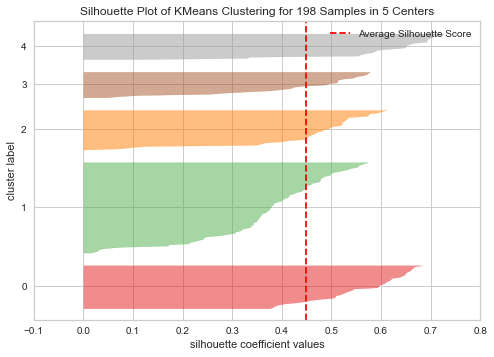

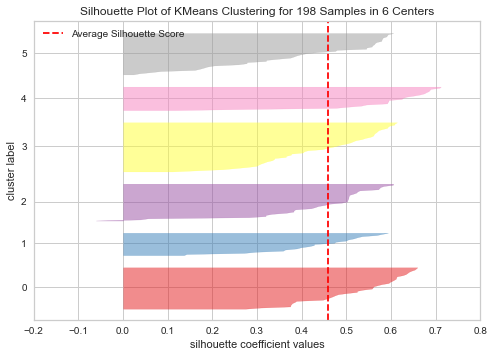

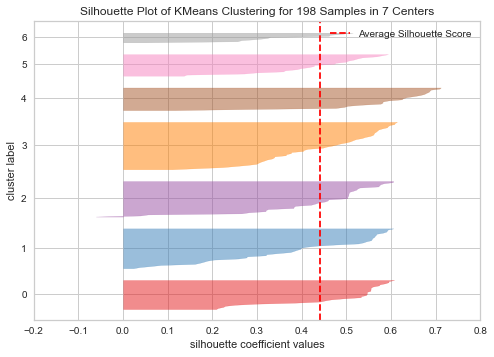

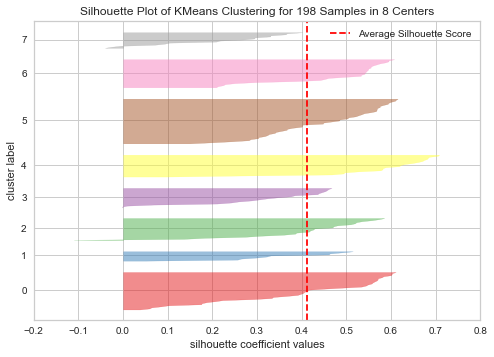

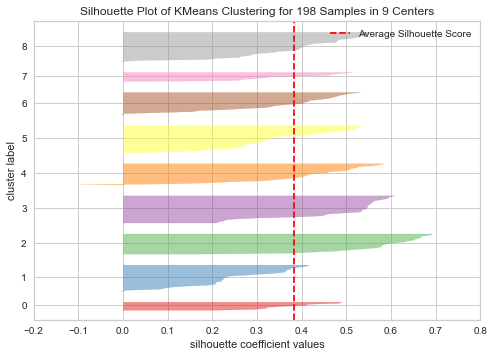

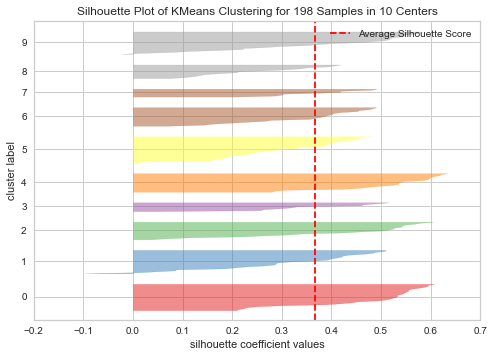

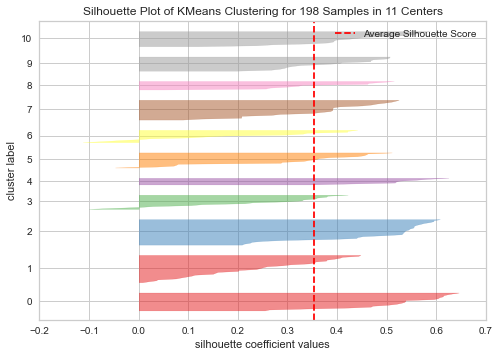

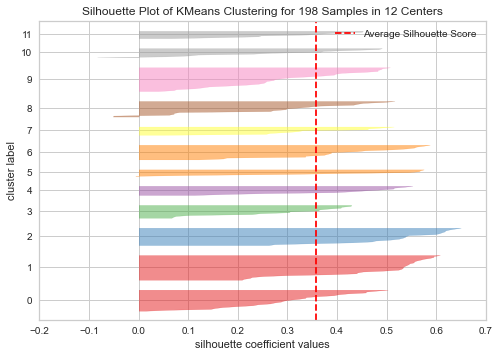

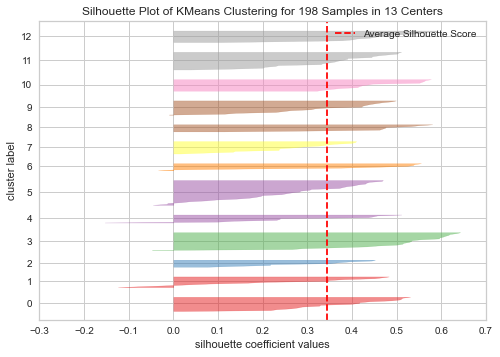

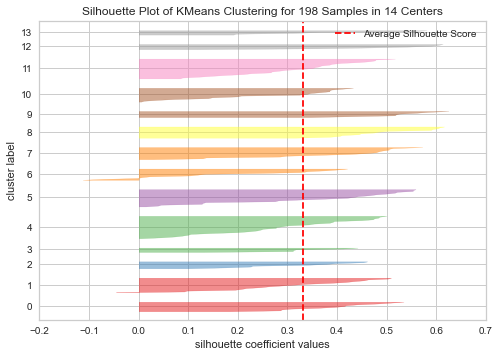

In [27]:
from yellowbrick.cluster import silhouette_visualizer
for i in range(5,15):
    silhouette_visualizer(KMeans(i, random_state=10), scaled_df)

#### After Evaluation of our model with the help of Elbow Method and Silhoutte Graphs we came to know that our data have 8 types of Customers .

### Recreating Model 

In [28]:
from sklearn.decomposition import PCA
from ipywidgets import interactive
import ipywidgets as widgets

In [29]:
def f(F1,F2,dimension_reduction='pca',components=2):
    
    if dimension_reduction == 'pca':
        values = PCA(n_components=components)
        values=values.fit_transform(scaled_df)
    else:
        values = scaled_df
    #global df1
    df1 = pd.DataFrame(values)
    model = KMeans(n_clusters=5)
    model.fit(df1)
    global labels
    labels= model.labels_
    df1['Labels_K_Means']= labels

    

    plt.figure(figsize=(15,7))
    plt.scatter(df1.iloc[:,F1],df1.iloc[:,F2], c=df1['Labels_K_Means'],cmap=matplotlib.colors.ListedColormap(colors),s=50)
    plt.show()

interactive_plot = interactive(f, F1=(0, 3,1), F2=(0, 3, 1),    dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),  ('without', None)],
                                                       description='Dimensionality Reduction',
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
                              components=widgets.SelectionSlider(options=range(2,4), value=3,description='PCA components',
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=1, description='F1', max=3), IntSlider(value=1, description='F2', max=3)…

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 2nd Model DB Scane 

### Model Building

In [31]:
from sklearn.cluster import DBSCAN
model = DBSCAN()
model.fit(scaled_df)

DBSCAN()

### Labels

In [32]:
Labels = model.labels_
Labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

### Evaluation 

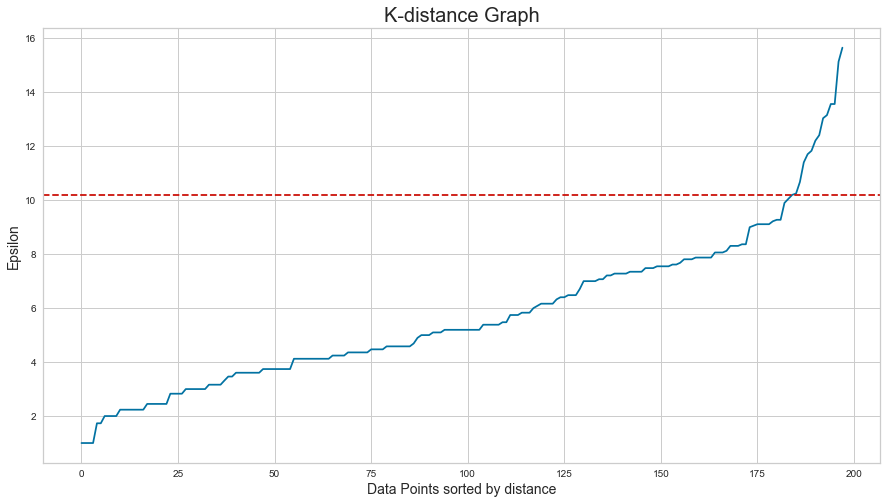

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df) # DISTANCE IS Average calculates the average distance between each point and its k nearest neighbors, where k = the Minimum samples
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=10.2, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [72]:
for min_samples in range(1,15,1):
    clusterer = DBSCAN(eps=9, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(scaled_df)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',10.2,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 10.2 | min_samples=  1 | obtained clustering:  [(2, 1), (3, 15), (4, 1), (5, 5), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 4), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 47), (21, 28), (22, 1), (23, 7), (24, 1), (25, 2), (26, 3), (27, 30), (28, 2), (29, 2), (30, 4), (31, 1), (32, 6), (33, 2), (34, 1), (35, 1), (36, 3), (37, 2), (38, 2), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1)]
eps= 10.2 | min_samples=  2 | obtained clustering:  [(1, 24), (2, 15), (3, 5), (4, 2), (5, 2), (6, 4), (7, 2), (8, 47), (9, 28), (10, 7), (11, 2), (12, 3), (13, 30), (14, 2), (15, 2), (16, 4), (17, 6), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 2)]
eps= 10.2 | min_samples=  3 | obtained clustering:  [(1, 46), (2, 15), (3, 5), (4, 4), (5, 47), (6, 28), (7, 7), (8, 30), (9, 3), (10, 4), (11, 6), (12, 3)]
eps= 10.2 | min_samples=  4 | obtained clustering:  [(1, 68), (2, 14), (3, 28), (4, 44), (5, 7), (6, 28), (7, 4), (8, 5)]
ep

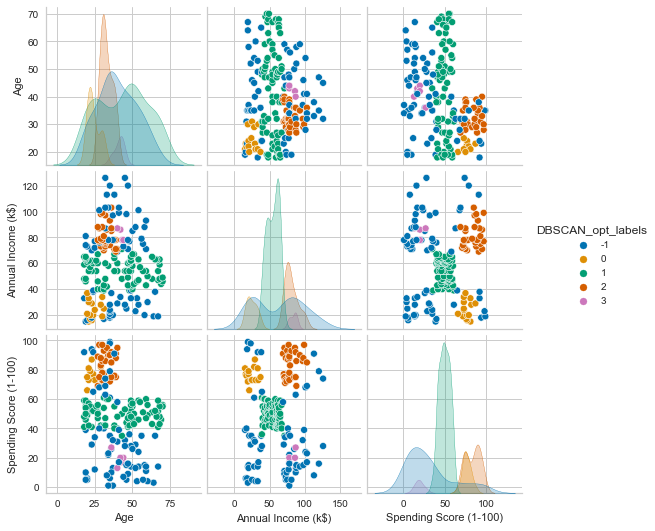

In [35]:
df2=data.copy()
model = DBSCAN(  eps=10,
    min_samples=5)
model.fit(scaled_df)
DBSCAN_opt_labels=model.labels_
df2['DBSCAN_opt_labels']=model.labels_
sns.pairplot(data = df2.iloc[:,2:],hue='DBSCAN_opt_labels',palette='colorblind');

### 3rd Model Hierarchical

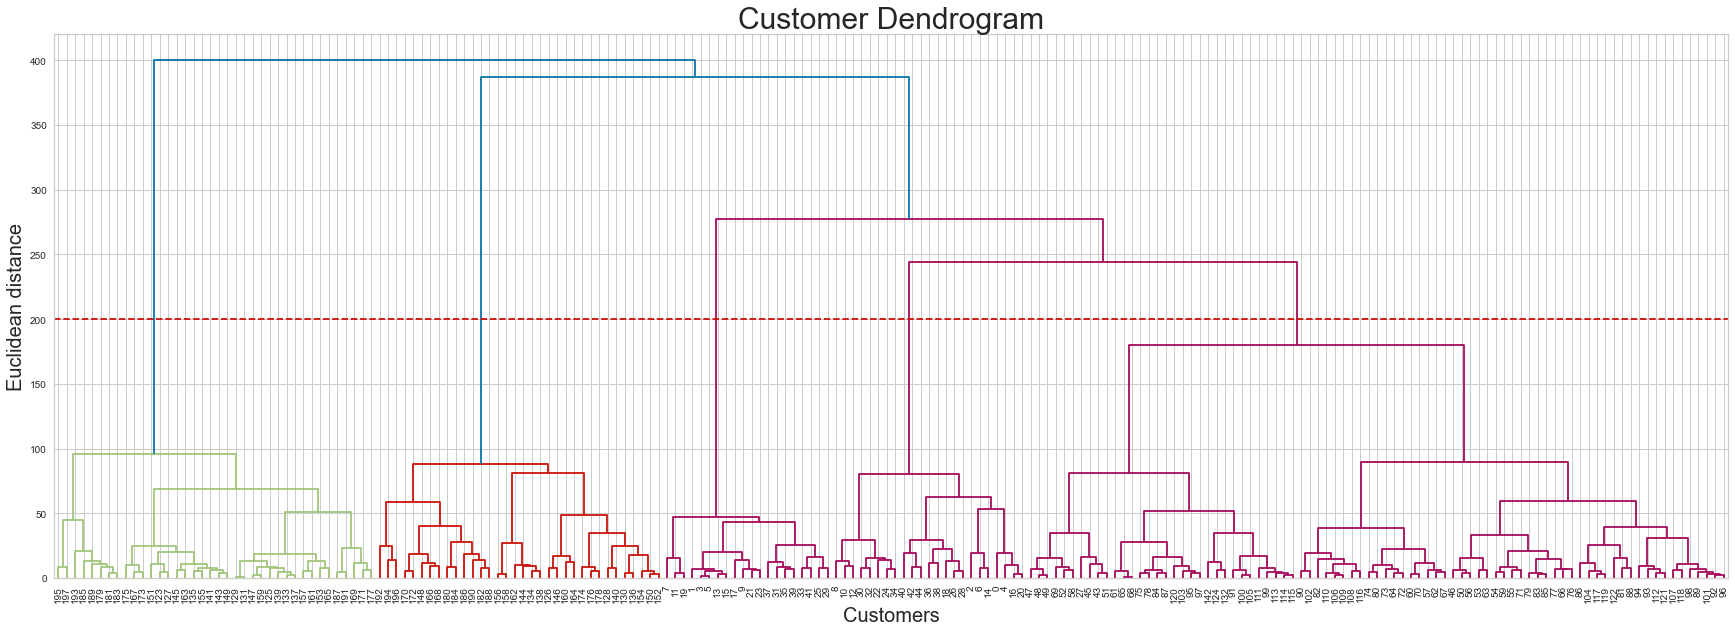

In [36]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(data.iloc[:,2:], method = 'ward'))
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [37]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data.iloc[:,2:])

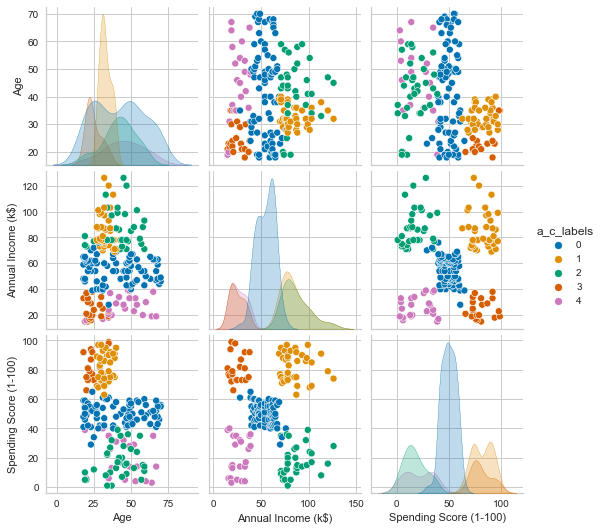

In [38]:
df3=data.copy()
df3['a_c_labels'] = y_hc
sns.pairplot(df3.iloc[:,2:],hue='a_c_labels',palette='colorblind');

# Comparision

In [62]:
#COMBINING ALL LABELS TO DATA
data['K Means Labels'] = labels
data['DBSCAN Labels'] = DBSCAN_opt_labels
data['Hierarchical Labels'] = y_hc
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K Means Labels,DBSCAN Labels,Hierarchical Labels
0,1,Male,19,15,39,4,-1,4
1,2,Male,21,15,81,3,0,3
2,3,Female,20,16,6,4,-1,4
3,4,Female,23,16,77,3,0,3
4,5,Female,31,17,40,4,-1,4
...,...,...,...,...,...,...,...,...
193,194,Female,38,113,91,2,-1,1
194,195,Female,47,120,16,1,-1,2
195,196,Female,35,120,79,2,-1,1
196,197,Female,45,126,28,1,-1,2


In [89]:
#Replacing Numeric with Type of Customers
data['K Means Labels'].replace(to_replace=[ 0, 1, 2, 3, 4], value=[ 'Careless', 'Impulsive', 'Discount Customers', 'Target Audiance', 'Sensible'],   inplace = True)
data['DBSCAN Labels'].replace(to_replace=[-1, 0, 1, 2, 3, 4], value=['New Customers', 'Target Audiance', 'Impulsive', 'Discount Customers', 'Careless', 'Sensible'],   inplace = True)
data['Hierarchical Labels'].replace(to_replace=[ 0, 1, 2, 3, 4], value=['Target Audiance', 'Impulsive', 'Discount Customers', 'Careless', 'Sensible'],   inplace = True)


In [116]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K Means Labels,DBSCAN Labels,Hierarchical Labels
0,1,Male,19,15,39,Sensible,New Customers,Sensible
1,2,Male,21,15,81,Target Audiance,Target Audiance,Careless
2,3,Female,20,16,6,Sensible,New Customers,Sensible
3,4,Female,23,16,77,Target Audiance,Target Audiance,Careless
4,5,Female,31,17,40,Sensible,New Customers,Sensible


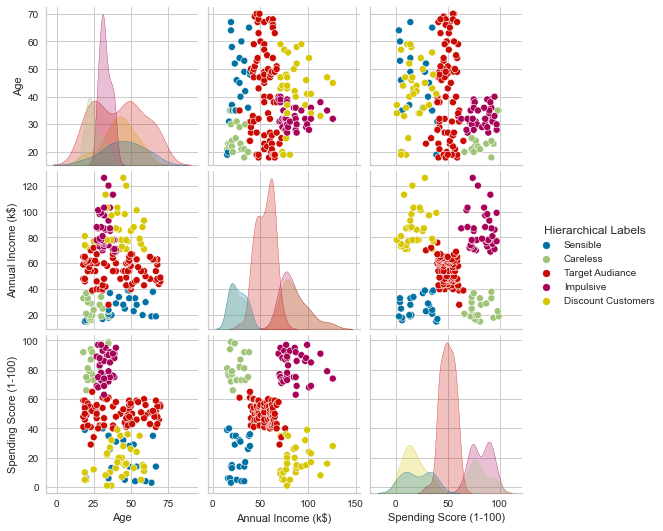

In [97]:
sns.pairplot(data.iloc[:,[2,3,4,7]],hue='Hierarchical Labels') #pairplot for all different types of customers

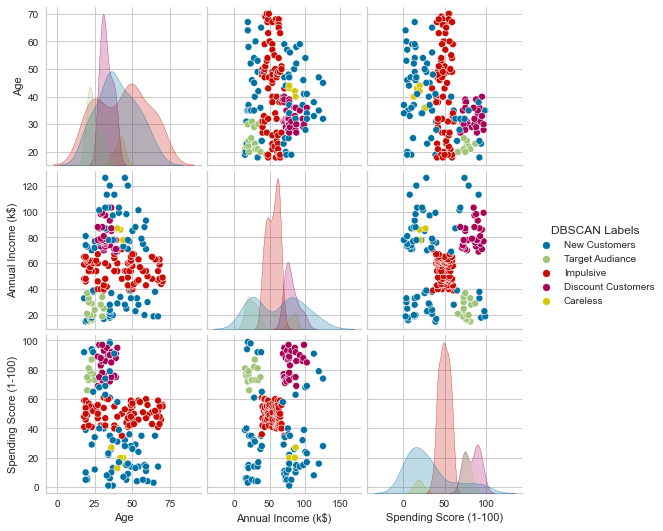

In [98]:
sns.pairplot(data.iloc[:,[2,3,4,6]],hue='DBSCAN Labels')

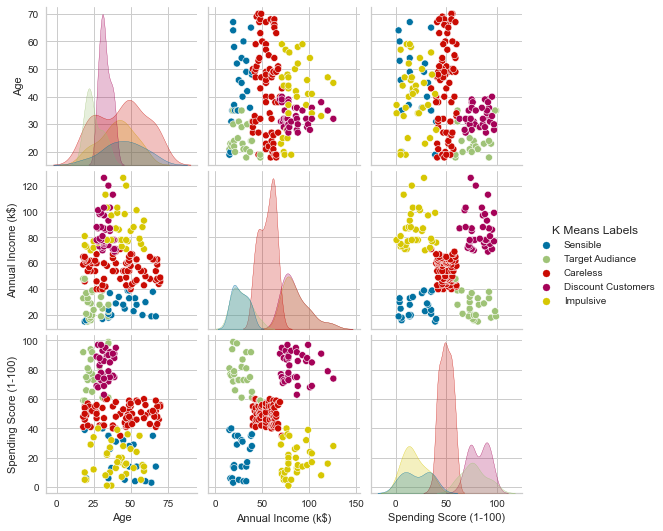

In [99]:
sns.pairplot(data.iloc[:,[2,3,4,5]],hue='K Means Labels')

# Different Types of Customers 

In [118]:
cst_type1 = data.iloc[:,[2,3,4,7]].groupby('Hierarchical Labels').mean()
cst_type1

,Age,Annual Income (k$),Spending Score (1-100)
Hierarchical Labels,,,
Careless,24.850000,24.950000,81.000000
Discount Customers,41.970588,86.794118,17.264706
Impulsive,32.763158,85.210526,82.105263
Sensible,45.217391,26.304348,20.913043
Target Audiance,42.156627,54.759036,49.771084


In [102]:
cst_type = data.groupby('Hierarchical Labels')

In [103]:
data['Hierarchical Labels'].unique()

array(['Sensible', 'Careless', 'Target Audiance', 'Impulsive',
       'Discount Customers'], dtype=object)

#### Sensible Customers

In [110]:
cst_type.get_group('Sensible').iloc[:,[0,1,2,3,4]].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3


#### Careless Customers

In [111]:
cst_type.get_group('Careless').iloc[:,[0,1,2,3,4]].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


#### Target Audiance

In [112]:
cst_type.get_group('Target Audiance').iloc[:,[0,1,2,3,4]].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
27,28,Male,35,28,61
43,44,Female,31,39,61
45,46,Female,24,39,65
46,47,Female,50,40,55
47,48,Female,27,40,47


#### Impulsive Customers

In [113]:
cst_type.get_group('Impulsive').iloc[:,[0,1,2,3,4]].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75


#### Discount Customers

In [114]:
cst_type.get_group('Discount Customers').iloc[:,[0,1,2,3,4]].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
126,127,Male,43,71,35
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7


# Insights

* Count of Male Customers is comparatively less than Female Customers
* Most of the customers age range in between 30-50 years
* Wide range of customer income range in between dollar 40-80k per annum.
* Most of the customers spending score is in between 30-70
* Major Customers is in the age of 30-35 with annual income dollar 60-80k anually and there spending score lie between 45-55
* Spending Score decrease as the age increase max spending score can be seen for the customers whose age is somewhere around 38
* As we can see Anuual income does not have much impact on spending score however customers who have annual income between 70-75K have higher spending score
* Females are less with low spending and very high spending score however there are more Females then males with medium spending Score
* Females count is high in the age range 30-50
* Below 50K annual income females count is high after that males are more than females who earn more then 50k annually
* Spending Score decrease as the age increase max spending score can be seen for the customers whose age is somewhere around 30 and 40 for both male and Females
* Females with Very-Less/Very-High income have high spending score as compair to males

# Recommendation

#### With the help of Clustring Technique we got five different clusters based on there features we have categorise them as mentioned below.

**Careless:** Customers who earn less but spend enough money.

**Impulsive:** Customers who earn enough money but spend most of it.

**Discount Customers:** Customers who earn enough money but spend on the basis of discount.

**Target Audiance:** Customers who earn median range of money and spend most of it.

**Sensible:** Customers who earn less and spend less.

So in order to increase sales we have to give the offers, notification to cutomers accordingly

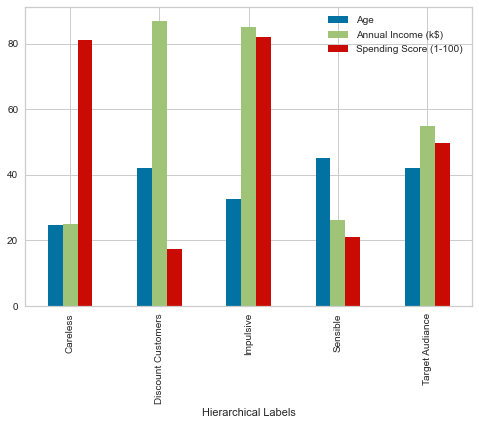

In [119]:
cst_type1.plot(kind='bar');